In [1]:
import pandas as pd
import numpy as np

In [2]:
TrainData = pd.read_csv('TrainData.csv', encoding = "ISO-8859-1" )

TestData = pd.read_csv('TestData.csv', encoding = "ISO-8859-1")


In [3]:
AirCanadaTest = pd.read_csv('AirCanada.csv', encoding = "ISO-8859-1")

In [4]:
AirCanadaTest.nunique()

Review       151
Sentiment      2
dtype: int64

In [5]:
TrainData['Sentiment'].unique()

array(['Positive', 'Negative', 'Negative '], dtype=object)

In [6]:
TestData.nunique()

Review       280
Sentiment      2
dtype: int64

In [7]:
TrainData['Sentiment'] = TrainData['Sentiment'].fillna(TrainData['Sentiment'].mode()[0])

In [8]:
TrainData.Sentiment.replace({"Negative ":"Negative"},inplace=True)

In [9]:
TrainData['Sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [10]:
TrainData

,Review,Sentiment
0,Update : Now that the tech issues have been ad...,Positive
1,Changing my rating since the problems are fixe...,Positive
2,App worked pretty much as expected. Could have...,Positive
3,Highly recommend when you travel with Air Cana...,Positive
4,The app went from very useful to absolutely us...,Positive
...,...,...
346,This app works OK generally but I have been ha...,Negative
347,Whenever I get a notification about a flight f...,Negative
348,I travel a lot on a number of airlines. Delta ...,Positive
349,Had to keep adding my flight info so I could u...,Negative


In [11]:
Data = pd.concat([TrainData,AirCanadaTest,TestData],axis=0,sort=False,ignore_index=True)

In [12]:
Data

,Review,Sentiment
0,Update : Now that the tech issues have been ad...,Positive
1,Changing my rating since the problems are fixe...,Positive
2,App worked pretty much as expected. Could have...,Positive
3,Highly recommend when you travel with Air Cana...,Positive
4,The app went from very useful to absolutely us...,Positive
...,...,...
780,This app works OK generally but I have been ha...,Negative
781,Whenever I get a notification about a flight f...,Negative
782,I travel a lot on a number of airlines. Delta ...,Positive
783,Had to keep adding my flight info so I could u...,Negative


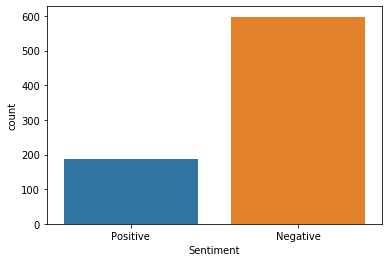

In [14]:
import seaborn as sns

sns.countplot(x='Sentiment', data=Data)

In [13]:
# build train and test datasets
reviews = Data['Review'].values
sentiments = Data['Sentiment'].values

train_reviews = reviews[:450]
train_sentiments = sentiments[:450]

test_reviews = reviews[450:]
test_sentiments = sentiments[450:]

In [14]:
print (train_reviews, train_sentiments )

['Update : Now that the tech issues have been addressed, changing to 4 stars from 1 star earlier. The checkin functionality is great and also like to call out ability to view incoming flights, often 3-4 flights down. Need to have Altitude Status and progression integrated into the app.'
 'Changing my rating since the problems are fixed in new update. Good work Air Canada.'
 'App worked pretty much as expected. Could have used terminal maps to know where we were going for our next gate.'
 'Highly recommend when you travel with Air Canada, Air Canada Rouge or AC Express.'
 'The app went from very useful to absolutely useless to useful again.'
 'Finally fixed! Thank you Air Canada'
 "I really like the previous interface. It was a big upgrade from the old app and yet the new interface had some welcome user friendly UI additions. What I don't understand is why some useful features were taken away such as integrating itinerary into the Calendar app and being able to change payment/personal i

# Text Wrangling and Normalization

In [15]:
from bs4 import BeautifulSoup
import re
import tqdm
import unicodedata

In [16]:
#function defined to remove html tags from data

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

In [17]:
#function defined to remove unicode data

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [18]:
# lower case and remove special characters\whitespaces

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    #doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [19]:
#Data_Preprocessing

norm_train_reviews = pre_process_corpus(train_reviews)
norm_test_reviews = pre_process_corpus(test_reviews)

100%|██████████| 335/335 [00:00<00:00, 4093.80it/s]


In [20]:
norm_train_reviews

['update now that the tech issues have been addressed changing to 4 stars from 1 star earlier the checkin functionality is great and also like to call out ability to view incoming flights often 34 flights down need to have altitude status and progression integrated into the app',
 'changing my rating since the problems are fixed in new update good work air canada',
 'app worked pretty much as expected could have used terminal maps to know where we were going for our next gate',
 'highly recommend when you travel with air canada air canada rouge or ac express',
 'the app went from very useful to absolutely useless to useful again',
 'finally fixed thank you air canada',
 'i really like the previous interface it was a big upgrade from the old app and yet the new interface had some welcome user friendly ui additions what i dont understand is why some useful features were taken away such as integrating itinerary into the calendar app and being able to change paymentpersonal info in the app

In [21]:
norm_test_reviews

['terrible frustrating aggravating and worst of all useless',
 'newest update didnt work on my most recent flight monday disappointing considering that part of my fare pays for this non functioning entertainment',
 'i used this for my boarding pass and it crashed just as i tried to scan in at security i couldnt get it to restart i had to leave the long line that i had waited in and go out to get a paper boarding pass then go through the line again later i had to uninstall and reinstall the app to get it working again also it takes a lot of clicks to find the not so obvious location of the boarding passes the old app was great this version is not samsung note 10',
 'what have you done this app used to be so good you could do so much so easily now i cant manage many of the things i could before and to make matters worse old bookings keep popping up no matter how often i remove them and trips i enter disappear the next day its like they took away features gave it a new face and called it 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=5, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)

In [24]:
print (cv.get_feature_names())

['10', '24', 'ability', 'ability to', 'able', 'able to', 'about', 'absolutely', 'ac', 'access', 'access to', 'account', 'actually', 'add', 'added', 'adding', 'aeroplan', 'after', 'again', 'again and', 'agent', 'ago', 'air', 'air canada', 'airline', 'airline app', 'airline apps', 'airlines', 'airport', 'all', 'all my', 'all of', 'all the', 'allow', 'allowed', 'almost', 'already', 'also', 'altitude', 'always', 'am', 'an', 'an airline', 'an app', 'an error', 'an issue', 'and', 'and ac', 'and also', 'and boarding', 'and calendar', 'and confirmation', 'and gate', 'and had', 'and has', 'and have', 'and it', 'and its', 'and not', 'and reinstalled', 'and that', 'and the', 'and was', 'and when', 'android', 'annoying', 'another', 'any', 'anymore', 'anything', 'app', 'app and', 'app but', 'app does', 'app doesnt', 'app for', 'app has', 'app have', 'app if', 'app is', 'app it', 'app no', 'app should', 'app sucks', 'app that', 'app this', 'app to', 'app was', 'app which', 'app will', 'app works', '

In [25]:
print(cv_train_features.toarray())

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
cv_test_features = cv.transform(norm_test_reviews)

In [27]:
cv_test_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (450, 925)  Test features shape: (335, 925)


In [29]:
cv_train_features

<450x925 sparse matrix of type '<class 'numpy.int64'>'
	with 15707 stored elements in Compressed Sparse Row format>

In [30]:
# Logistic Regression model on BOW features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, solver='lbfgs', random_state=42)

# train model
lr.fit(cv_train_features, train_sentiments)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# predict on splitted test data
lr_bow_predictions = lr.predict(cv_test_features)

In [32]:
lr_bow_predictions

array(['Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negati

In [33]:
#Classigication Report

from sklearn.metrics import confusion_matrix, classification_report

labels = ['negative', 'positive']
print(classification_report(test_sentiments, lr_bow_predictions))
pd.DataFrame(confusion_matrix(test_sentiments, lr_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    Negative       0.96      0.93      0.95       297
    Positive       0.56      0.74      0.64        38

    accuracy                           0.90       335
   macro avg       0.76      0.83      0.79       335
weighted avg       0.92      0.90      0.91       335



,negative,positive
negative,275,22
positive,10,28


In [34]:
#TestData Validation

TestData = pd.read_csv('TestReviews.csv')

In [35]:
TestData

,Review,Sentiment
0,Won't let me check in. I thought the most rece...,NaN
1,I type in the booking reference and the app cr...,NaN
2,"This new App sucks, I am a frequent flyer with...",NaN
3,Doesn't work... won't find my reservations... ...,NaN
4,Nov 2019 Unstable app! So many crashes. So har...,NaN
5,"Just go to the mobile website, this app sucks....",NaN
6,"Error - 1022 We can't search for flights, beca...",NaN
7,Even if someone hires an app developer and pay...,NaN
8,11/30/19 Update: This update caused a duplicat...,NaN
9,OK... I upgraded the rating to 3 stars. To the...,NaN


In [36]:
#Data Pre-processing

reviews = TestData['Review'].values

norm_reviews = pre_process_corpus(reviews)

cv_test_data = cv.transform(norm_reviews)

100%|██████████| 50/50 [00:00<00:00, 2794.04it/s]


In [37]:
lr_test_predictions = lr.predict(cv_test_data)

In [38]:
lr_test_predictions

array(['Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive'],
      dtype=object)

In [39]:
test_pred = pd.DataFrame(lr_test_predictions,columns= ["Sentiment"])
pred_result = pd.concat([TestData[["Review"]],test_pred] ,axis = 1)
pred_result.to_csv('PredictedResult.csv',index = False)

In [40]:
pred_result['Sentiment'].value_counts()

Negative    36
Positive    14
Name: Sentiment, dtype: int64

In [41]:

# Random Forest model on BOW features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# train model
rf.fit(cv_train_features, train_sentiments)

# predict on test data
rf_bow_predictions = rf.predict(cv_test_features)

In [42]:
rf_bow_predictions

array(['Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negati

In [43]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, rf_bow_predictions))
pd.DataFrame(confusion_matrix(test_sentiments, rf_bow_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96       297
    Positive       0.71      0.63      0.67        38

    accuracy                           0.93       335
   macro avg       0.83      0.80      0.81       335
weighted avg       0.93      0.93      0.93       335



,negative,positive
negative,287,10
positive,14,24


In [44]:
#Predict on Test Data

rf_test_predictions = rf.predict(cv_test_data)

In [45]:
rf_pred = pd.DataFrame(rf_test_predictions,columns= ["Sentiment"])
rf_pred_result = pd.concat([TestData[["Review"]],test_pred] ,axis = 1)
rf_pred_result.to_csv('PredictedResult.csv',index = False)

In [46]:
rf_pred_result

,Review,Sentiment
0,Won't let me check in. I thought the most rece...,Negative
1,I type in the booking reference and the app cr...,Negative
2,"This new App sucks, I am a frequent flyer with...",Positive
3,Doesn't work... won't find my reservations... ...,Negative
4,Nov 2019 Unstable app! So many crashes. So har...,Negative
5,"Just go to the mobile website, this app sucks....",Negative
6,"Error - 1022 We can't search for flights, beca...",Negative
7,Even if someone hires an app developer and pay...,Negative
8,11/30/19 Update: This update caused a duplicat...,Negative
9,OK... I upgraded the rating to 3 stars. To the...,Positive


In [47]:
#TestData Validation - ReviewsData_Fly Delta

Delta_Test = pd.read_csv('ReviewsData_FlyDelta.csv')

print (Delta_Test)

#Data Pre-processing

del_reviews = Delta_Test['Review'].values

norm_del_reviews = pre_process_corpus(del_reviews)

cv_delta = cv.transform(norm_del_reviews)

#Prediction on Test Data

lr_delta_predictions = lr.predict(cv_delta)



                                                Review Unnamed: 1
0    Myself and 2 girls went to check in and realiz...        NaN
1    OMG. I did it so on October 23 this was my ver...        NaN
2    Once the flight attendant Kara and Jay found o...        NaN
3    Our last 2 experiences with Delta have really ...        NaN
4    Since 2009 I have flown to Philippines for per...        NaN
..                                                 ...        ...
201  Useless PoC. You can immediately tell it never...        NaN
202  Don't log in as guest, as it may forget your b...        NaN
203  This app just randomly loses your data, and cr...        NaN
204        Boarding passes only show up half the time.        NaN
205  i wish there was a button when youre on your w...        NaN

[206 rows x 2 columns]


100%|██████████| 206/206 [00:00<00:00, 3149.71it/s]


In [48]:
#print (lr_delta_predictions)

lr_pred = pd.DataFrame(lr_delta_predictions,columns= ["Sentiment"])

lr_pred

,Sentiment
0,Negative
1,Negative
2,Positive
3,Negative
4,Positive
...,...
201,Negative
202,Positive
203,Positive
204,Negative


In [49]:
df_pred_result = pd.concat([Delta_Test[["Review"]],lr_pred] ,axis = 1)
df_pred_result.to_csv('Lr_DeltaResult.csv',index = False)

df_pred_result

,Review,Sentiment
0,Myself and 2 girls went to check in and realiz...,Negative
1,OMG. I did it so on October 23 this was my ver...,Negative
2,Once the flight attendant Kara and Jay found o...,Positive
3,Our last 2 experiences with Delta have really ...,Negative
4,Since 2009 I have flown to Philippines for per...,Positive
...,...,...
201,Useless PoC. You can immediately tell it never...,Negative
202,"Don't log in as guest, as it may forget your b...",Positive
203,"This app just randomly loses your data, and cr...",Positive
204,Boarding passes only show up half the time.,Negative


In [50]:
#Predict on Test Data

rf_test_delta = rf.predict(cv_delta)

rf_pred_delta = pd.DataFrame(rf_test_delta,columns= ["Sentiment"])

rf_pred_delta = pd.concat([Delta_Test[["Review"]],lr_pred] ,axis = 1)
rf_pred_delta.to_csv('rf_deltaResult.csv',index = False)


In [51]:
rf_pred_delta

,Review,Sentiment
0,Myself and 2 girls went to check in and realiz...,Negative
1,OMG. I did it so on October 23 this was my ver...,Negative
2,Once the flight attendant Kara and Jay found o...,Positive
3,Our last 2 experiences with Delta have really ...,Negative
4,Since 2009 I have flown to Philippines for per...,Positive
...,...,...
201,Useless PoC. You can immediately tell it never...,Negative
202,"Don't log in as guest, as it may forget your b...",Positive
203,"This app just randomly loses your data, and cr...",Positive
204,Boarding passes only show up half the time.,Negative


In [52]:
#TestData Validation - Aircanada

AirC_Test = pd.read_csv('AirCanada2.csv', encoding = "ISO-8859-1")

print (AirC_Test)

#Data Pre-processing

can_reviews = AirC_Test['Review'].values

norm_can_reviews = pre_process_corpus(can_reviews)

cv_airc = cv.transform(norm_can_reviews)

#Prediction on Test Data

lr_airc_predictions = lr.predict(cv_airc)

                                                Review
0    Update : Now that the tech issues have been ad...
1    Changing my rating since the problems are fixe...
2    App worked pretty much as expected. Could have...
3    Highly recommend when you travel with Air Cana...
4    The app went from very useful to absolutely us...
..                                                 ...
195  the app will say it has no connection if it is...
196  While waiting as a restuarant for my order, I ...
197  I'm having issues recently. The error I get is...
198  Some things work well. But the chekin process ...
199  I am disappointed with this app! good thing i ...

[200 rows x 1 columns]


100%|██████████| 200/200 [00:00<00:00, 2476.37it/s]


In [53]:
lr_airc_predictions

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

In [54]:
lr_can_pred = pd.DataFrame(lr_airc_predictions,columns= ["Sentiment"])

lr_can_pred

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
195,Negative
196,Negative
197,Negative
198,Negative


In [55]:
lr_pred_airc = pd.concat([AirC_Test[["Review"]],lr_can_pred] ,axis = 1)
lr_pred_airc.to_csv('lr_canResult.csv',index = False)

In [56]:
lr_pred_airc['Sentiment'].value_counts()

Positive    126
Negative     74
Name: Sentiment, dtype: int64

In [57]:
#TestData Validation - FlyDelta

Del_Test = pd.read_csv('FlyDelta2.csv', encoding = "ISO-8859-1")

Del_Test

#print (Del_Test)

#Data Pre-processing

del1_reviews = Del_Test['Review'].values

norm_del1_reviews = pre_process_corpus(del1_reviews)

cv_delta1 = cv.transform(norm_del1_reviews)

#Prediction on Test Data

lr_del1_predictions = lr.predict(cv_delta1)

100%|██████████| 55/55 [00:00<00:00, 1501.08it/s]


In [58]:
lr_del1_pred = pd.DataFrame(lr_del1_predictions,columns= ["Sentiment"])


In [59]:
lr_pred_del = pd.concat([Del_Test[["Review"]],lr_del1_pred] ,axis = 1)

In [60]:
lr_pred_del.to_csv('lr_delResult.csv',index = False)
lr_pred_del['Sentiment'].value_counts()

Negative    37
Positive    18
Name: Sentiment, dtype: int64

In [61]:
lr_pred_del

,Review,Sentiment
0,Works well most of the time. Would be better w...,Negative
1,Really cool app. Used it for my trip to and fr...,Negative
2,The app was great but the update often shows n...,Positive
3,Often flight info just disappears forcing to u...,Negative
4,Not bad does well with standard flights but on...,Positive
5,The app continues to get better! When will you...,Negative
6,The app continues to get better! When will you...,Negative
7,Could use some improvements but probably the b...,Positive
8,"Latest update wouldn't open, uninstalled and r...",Positive
9,The app is okay and does its duty... **Navigat...,Positive


In [62]:
#Predict on Test Data

rf_test_del1 = rf.predict(cv_delta1)

rf_pred_del1 = pd.DataFrame(rf_test_del1,columns= ["Sentiment"])

rf_pred_delta1 = pd.concat([Del_Test[["Review"]],rf_pred_del1] ,axis = 1)
rf_pred_delta1.to_csv('rf_del1taResult.csv',index = False)
rf_pred_delta1['Sentiment'].value_counts()

Negative    50
Positive     5
Name: Sentiment, dtype: int64

In [63]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [65]:
tv_test_features = tv.transform(norm_test_reviews)

In [66]:
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (450, 925)  Test features shape: (335, 925)


In [67]:
# Logistic Regression model on TF-IDF features

# train model
lr.fit(tv_train_features, train_sentiments)

# predict on test data
lr_tfidf_predictions = lr.predict(tv_test_features)

labels = ['negative', 'positive']
print(classification_report(test_sentiments, lr_tfidf_predictions))
pd.DataFrame(confusion_matrix(test_sentiments, lr_tfidf_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    Negative       0.93      0.99      0.96       297
    Positive       0.84      0.42      0.56        38

    accuracy                           0.93       335
   macro avg       0.89      0.71      0.76       335
weighted avg       0.92      0.93      0.91       335



,negative,positive
negative,294,3
positive,22,16


In [68]:
tv_test_data = tv.transform(norm_reviews)

In [69]:
lr_test_tfpred = lr.predict(tv_test_data)

In [70]:
lr_test_tfpred

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative'],
      dtype=object)

In [71]:
test_tfpred = pd.DataFrame(lr_test_tfpred,columns= ["Sentiment"])
tfpred_result = pd.concat([TestData[["Review"]],test_tfpred] ,axis = 1)
#pred_result.to_csv('PredictedResult.csv',index = False)

In [72]:
tfpred_result['Sentiment'].value_counts()

Negative    49
Positive     1
Name: Sentiment, dtype: int64

In [73]:
# Gradientboost Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc_fit = GradientBoostingClassifier(loss='deviance',learning_rate=0.05,n_estimators=5000,
                                     min_samples_split=2,min_samples_leaf=1,max_depth=1,random_state=42 )
gbc_fit.fit(cv_train_features, train_sentiments)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
# predict on splitted test data
gbc_predictions = gbc_fit.predict(cv_test_features)

In [76]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, gbc_predictions))
pd.DataFrame(confusion_matrix(test_sentiments, gbc_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    Negative       0.96      0.94      0.95       297
    Positive       0.61      0.71      0.66        38

    accuracy                           0.92       335
   macro avg       0.79      0.83      0.81       335
weighted avg       0.92      0.92      0.92       335



,negative,positive
negative,280,17
positive,11,27


# XGBoost

In [77]:
import xgboost as xgb

xgb_fit = xgb.XGBClassifier(max_depth=2, n_estimators=5000, learning_rate=0.05)
xgb_fit.fit(cv_train_features, train_sentiments)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [78]:
#conda install -c anaconda py-xgboost

In [79]:
#pip install xgboost

In [82]:
xgb_predictions = xgb_fit.predict(cv_test_features)

In [84]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, xgb_predictions))
pd.DataFrame(confusion_matrix(test_sentiments, xgb_predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    Negative       0.96      0.91      0.93       297
    Positive       0.50      0.68      0.58        38

    accuracy                           0.89       335
   macro avg       0.73      0.80      0.76       335
weighted avg       0.91      0.89      0.89       335



,negative,positive
negative,271,26
positive,12,26


In [85]:
xgb_test_tfpred = xgb_fit.predict(tv_test_data)

In [86]:
xgb_tfpred = pd.DataFrame(xgb_test_tfpred,columns= ["Sentiment"])
tfpred_result = pd.concat([TestData[["Review"]],xgb_tfpred] ,axis = 1)
#pred_result.to_csv('PredictedResult.csv',index = False)

In [87]:
tfpred_result['Sentiment'].value_counts()

Negative    41
Positive     9
Name: Sentiment, dtype: int64

In [89]:
gbc_test_tfpred = gbc_fit.predict(tv_test_data)

In [90]:
gbc_tfpred = pd.DataFrame(gbc_test_tfpred,columns= ["Sentiment"])
gbc_tfpred_result = pd.concat([TestData[["Review"]],gbc_tfpred] ,axis = 1)
#pred_result.to_csv('PredictedResult.csv',index = False)

In [91]:
gbc_tfpred_result['Sentiment'].value_counts()

Positive    50
Name: Sentiment, dtype: int64